#Contents

1. Import Libraries and Data

2. Setting up for exploratory analysis

3. Correlation Matrix Heatmap

4. Discussion on heatmap

5. Scatterplot of strongest correlation

6. Discussion on scatterplot

7. Scatterplot of surprisingly weak correlation

8. Discussion of 2nd Scatter Plot

9. Pair Plot

10. Pair Plot Discussion

11. Categorical Plot

12. Categorical Plot Discussion


# 1. Import Libraries and Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [5]:
df = pd.read_csv('/content/drive/MyDrive/test_Matches_Data_Clean_Post 1900.csv')

In [6]:
df.head()

Match ID                 Match Name  Start Date    End Date        Team 1  \
0     62387  Australia Vs South Africa  27/05/1912  28/05/1912     Australia   
1     62388    England Vs South Africa  10/06/1912  12/06/1912  South Africa   
2     62389       England Vs Australia  24/06/1912  26/06/1912       England   
3     62390    England Vs South Africa  08/07/1912  10/07/1912       England   
4     62391  Australia Vs South Africa  15/07/1912  17/07/1912  South Africa   

   Innings 1 Team 1 Runs  Innings 1 Team 1 Wickets  Innings 1 Team 1 Extras  \
0                    448                        10                       24   
1                     58                        10                       17   
2                    310                         7                       22   
3                    242                        10                       14   
4                    263                        10                       29   

   Innings 2 Team 1 Runs  Innings 2 Team 1 Wickets  ...  \
0                    NaN                       NaN  ...   
1                  217.0                      10.0  ...   
2                    NaN                       NaN  ...   
3                  238.0                      10.0  ...   
4                  173.0                      10.0  ...   

   Innings 2 Team 2 Runs Innings 2 Team 2 Wickets  Innings 2 Team 2 Extras  \
0                   95.0                     10.0                      9.0   
1                    NaN                      NaN                      NaN   
2                    NaN                      NaN                      NaN   
3                  159.0                     10.0                     11.0   
4                   48.0                      0.0                      1.0   

          Venue        City  Country   Toss Winner  Toss Winner Choice  \
0  Old Trafford  Manchester  England     Australia                 bat   
1        Lord's      London  England  South Africa                 bat   
2        Lord's      London  England       England                 bat   
3    Headingley       Leeds  England       England                 bat   
4        Lord's      London  England  South Africa                 bat   

      Winner                                   Result  
0  Australia  Australia won by an innings and 88 runs  
1    England    England won by an innings and 62 runs  
2        NaN                              Match drawn  
3    England                  England won by 174 runs  
4  Australia              Australia won by 10 wickets  

[5 rows x 25 columns]

# 2. Setting up for exploratory analysis

In [7]:
#Subset of just the numeric value columns

df_sub = df.select_dtypes(include=['int', 'float'])

In [8]:
df_sub.head()

Match ID  Innings 1 Team 1 Runs  Innings 1 Team 1 Wickets  \
0     62387                    448                        10   
1     62388                     58                        10   
2     62389                    310                         7   
3     62390                    242                        10   
4     62391                    263                        10   

   Innings 1 Team 1 Extras  Innings 2 Team 1 Runs  Innings 2 Team 1 Wickets  \
0                       24                    NaN                       NaN   
1                       17                  217.0                      10.0   
2                       22                    NaN                       NaN   
3                       14                  238.0                      10.0   
4                       29                  173.0                      10.0   

   Innings 2 Team 1 Extras  Innings 1 Team 2 Runs  Innings 1 Team 2 Wickets  \
0                      NaN                  265.0                      10.0   
1                     19.0                  337.0                      10.0   
2                      NaN                  282.0                       7.0   
3                     10.0                  147.0                      10.0   
4                     13.0                  390.0                      10.0   

   Innings 1 Team 2 Extras  Innings 2 Team 2 Runs  Innings 2 Team 2 Wickets  \
0                     11.0                   95.0                      10.0   
1                     21.0                    NaN                       NaN   
2                     27.0                    NaN                       NaN   
3                     12.0                  159.0                      10.0   
4                     30.0                   48.0                       0.0   

   Innings 2 Team 2 Extras  
0                      9.0  
1                      NaN  
2                      NaN  
3                     11.0  
4                      1.0

In [10]:
df_sub.columns

Index(['Match ID', 'Innings 1 Team 1 Runs', 'Innings 1 Team 1 Wickets',
       'Innings 1 Team 1 Extras', 'Innings 2 Team 1 Runs',
       'Innings 2 Team 1 Wickets', 'Innings 2 Team 1 Extras',
       'Innings 1 Team 2 Runs', 'Innings 1 Team 2 Wickets',
       'Innings 1 Team 2 Extras', 'Innings 2 Team 2 Runs',
       'Innings 2 Team 2 Wickets', 'Innings 2 Team 2 Extras'],
      dtype='object')

In [13]:
#Drop #Match ID' column

df_sub = df_sub.drop(['Match ID'], axis=1)


In [14]:
df_sub.columns

Index(['Innings 1 Team 1 Runs', 'Innings 1 Team 1 Wickets',
       'Innings 1 Team 1 Extras', 'Innings 2 Team 1 Runs',
       'Innings 2 Team 1 Wickets', 'Innings 2 Team 1 Extras',
       'Innings 1 Team 2 Runs', 'Innings 1 Team 2 Wickets',
       'Innings 1 Team 2 Extras', 'Innings 2 Team 2 Runs',
       'Innings 2 Team 2 Wickets', 'Innings 2 Team 2 Extras'],
      dtype='object')

#3. Correlation Matrix Heatmap

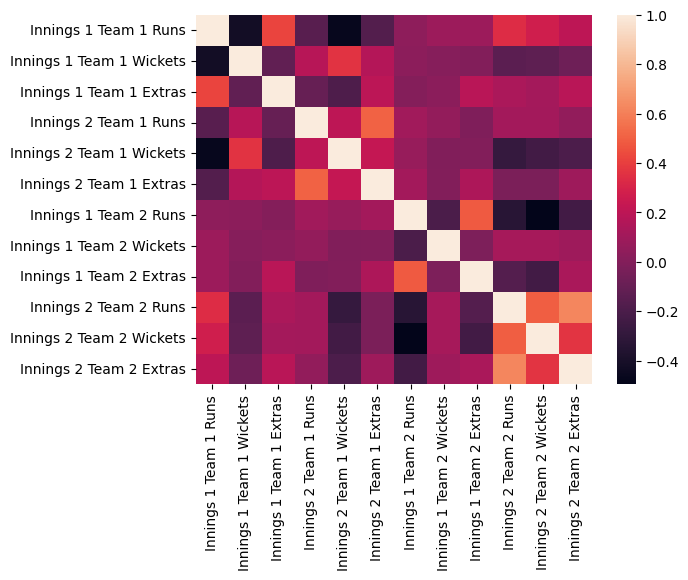

In [15]:
#basic heatmap

sns.heatmap(df_sub.corr());

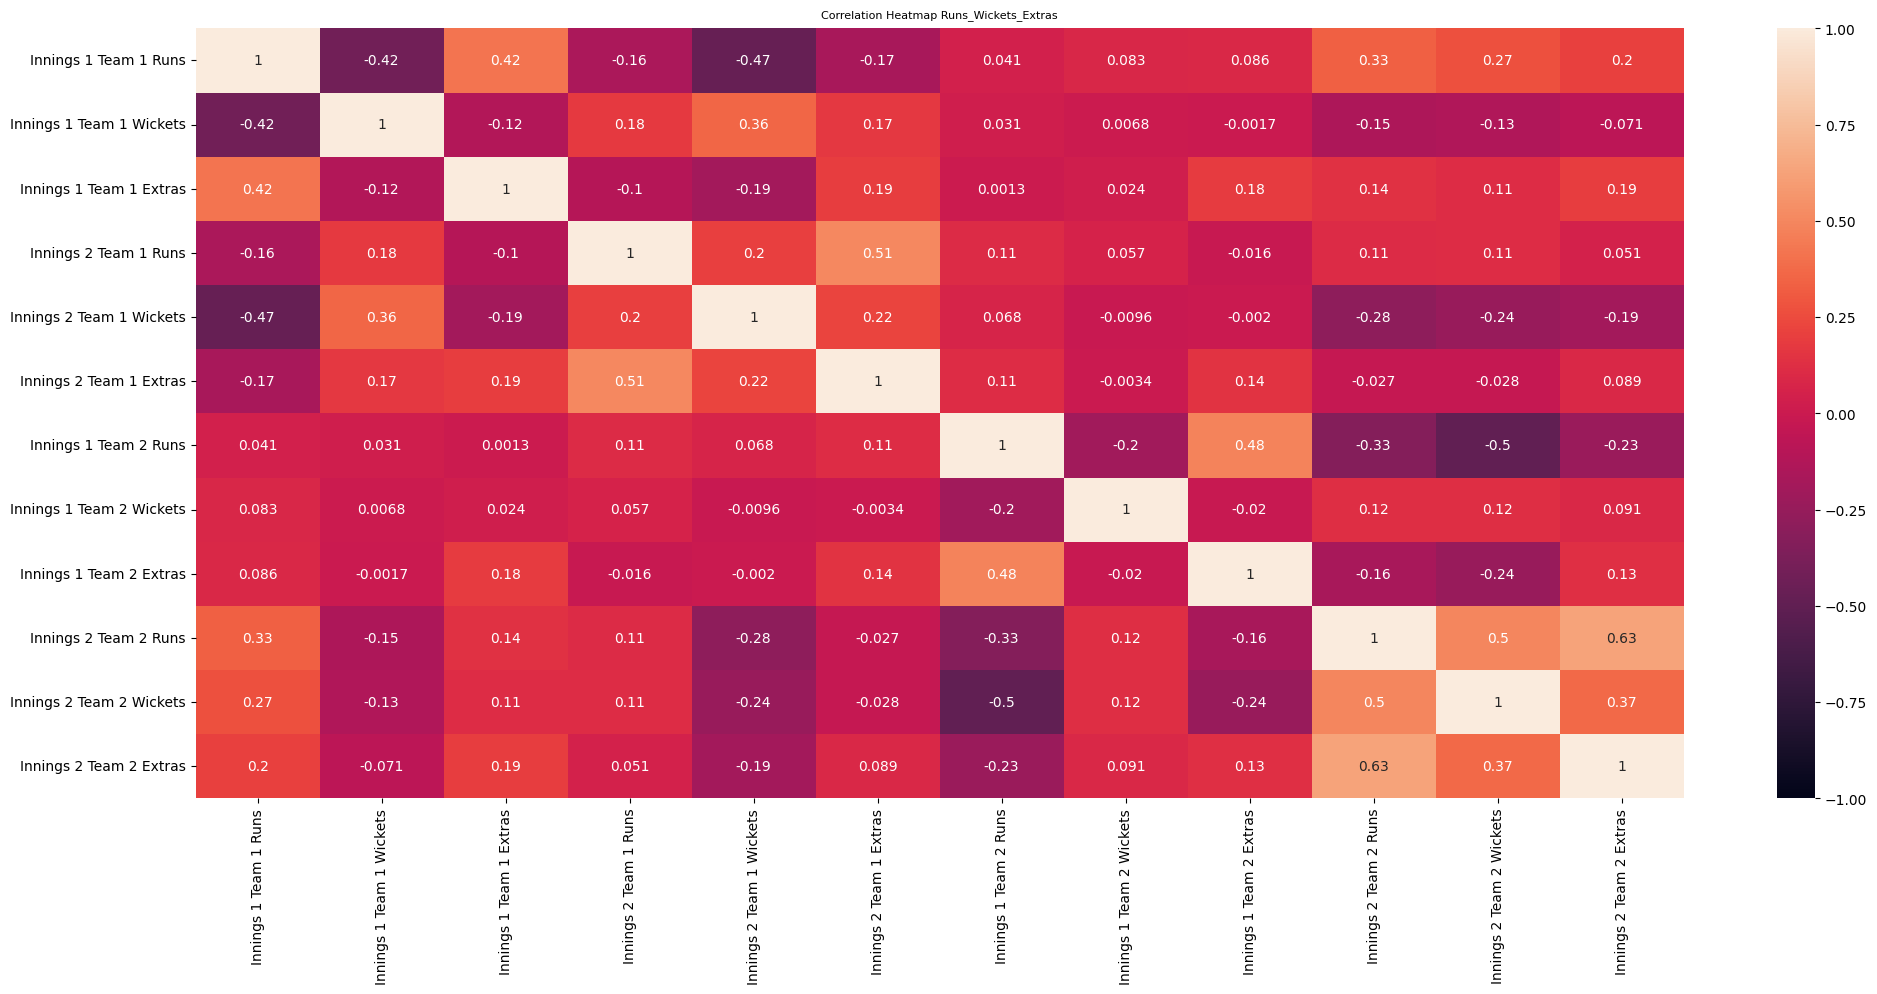

In [16]:
# Increase the size of the heatmap

plt.figure(figsize=(24, 10))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).

# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap

heatmap = sns.heatmap(df_sub.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.

heatmap.set_title('Correlation Heatmap Runs_Wickets_Extras', fontdict={'fontsize':8}, pad=8);

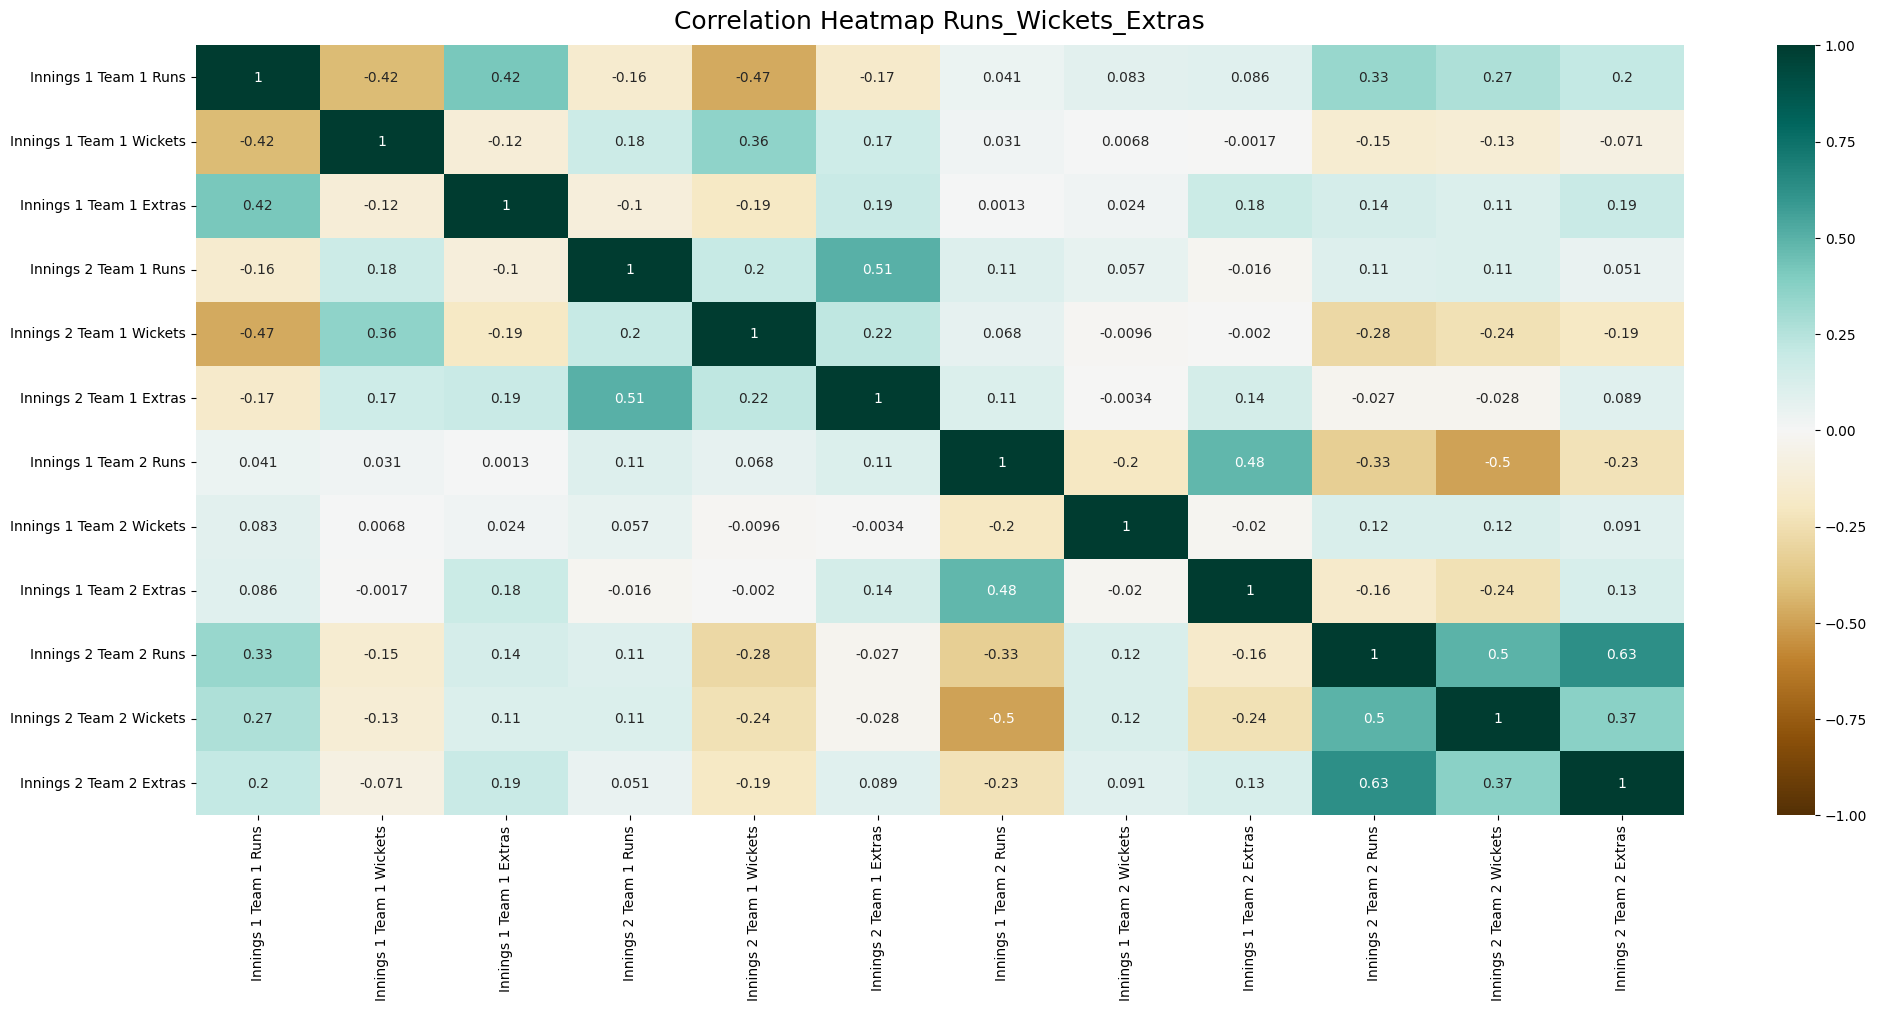

In [17]:
plt.figure(figsize=(24, 10))

#Change the palette

heatmap = sns.heatmap(df_sub.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Correlation Heatmap Runs_Wickets_Extras', fontdict={'fontsize':18}, pad=12);

# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped

plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [19]:
#Above and below the diagonal are the same values - doesn't add much

#Followint tezchnque gives a binary value to above orf below diagonal, so that top can ultimately be masked

np.triu(np.ones_like(df_sub.corr()))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

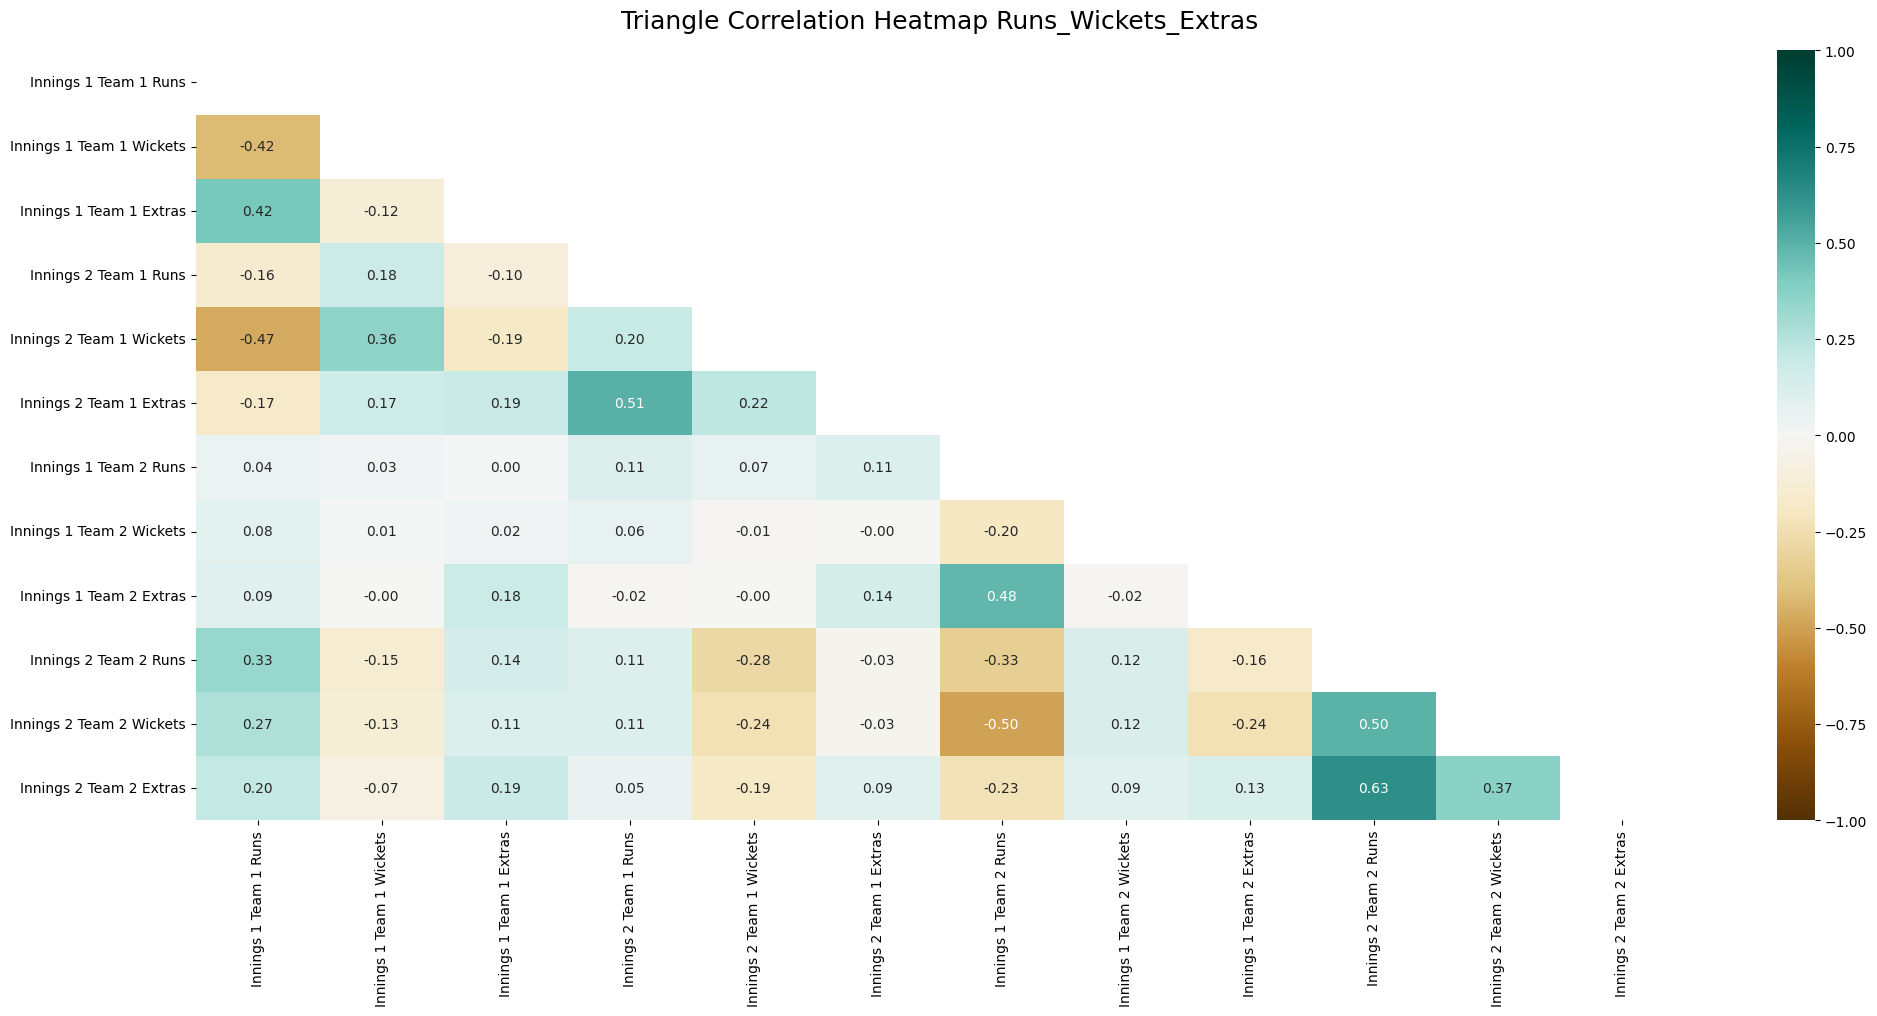

In [21]:
plt.figure(figsize=(24,10))

# define the mask to set the values in the upper triangle to True

mask = np.triu(np.ones_like(df_sub.corr(), dtype=np.bool))

#Also setting to two decimal places - just for consistency, cleaninlinesss

heatmap = sns.heatmap(df_sub.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG', fmt=".2f")

heatmap.set_title('Triangle Correlation Heatmap Runs_Wickets_Extras', fontdict={'fontsize':18}, pad=16);

plt.savefig('triangle_heatmap.png', dpi=300, bbox_inches='tight')

# 4. Discussion on heatmap

A strongly positive correaltion is over 0.5 - darker shades of green

The correlations we see most of are as Runs go up in an inning so do extras. This is what we would expect, a longer innings will lilley produce more extras, assuming they come at a regular rate.

This is most true in the final innings of a match (Team 2, Innings 2)



We also have negative correlations and one strong one between Innings 2, Team 2 Wickets and Innings 1, Team 2 runs. In other words, the more runs Team 2 scores in their first innings the fewer wickets they will lose in theri 2nd innings. Perhaps a bit less expected, but perhaps this means the second innings is less likely to beed to be completed.

There is a similar reationship between Innins 1 team 1 Runs and Innings 2 Team 1 wickets.



There are also some very weak / no relationships between some variables. For instance, there is almost no relationship between Runs scored in the 1st innings by Team 1 and runs scored in the 1st innings by Team 2. And that is perhaps conter intuitive.
We might expect that the surface might dictate that both soides will score highly or lowly, this is perhaps not the case. OR there are simply enough matches for this to balance out over time.

# 5. Scatterplot of strongest correlation

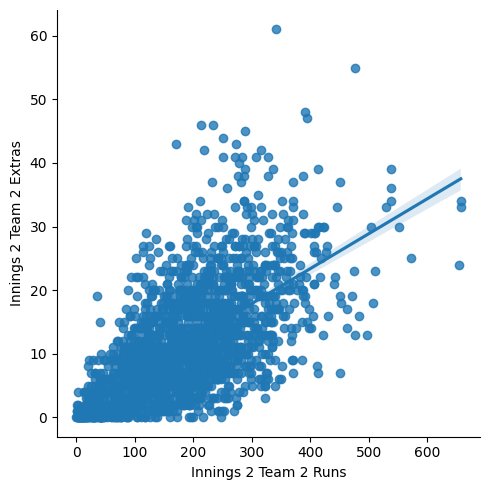

In [32]:
# Creating a scatterplot for the "Innings 2 Team 2 Runs" and "Innings 2 Team 2 Extras" columns in seaborn

scatter = sns.lmplot(x = 'Innings 2 Team 2 Runs', y = 'Innings 2 Team 2 Extras', data = df_sub)

In [33]:
#Save as .png

scatter.savefig("/content/scatter_runs_extras.png")

# 6. Discussion on scatterplot

This produces an interesting result.
Most often under 300 runs are scored, and here there is a pattern that the rextras will go up rouhgly inproportion with the runs. It's not exact, and it's still a fiarlu wide spread. There also some outliers

Once beyond about 300 runs that pattern is much less clear - but there is also much less data - scorign over 300 in the 4th innings is unusal. But theer are a couple of outliers where it is clear the wheels have come off for the bowling side and they have conceded 45+ in extras!

# 7. Scatterplot of surprisingly weak correlation



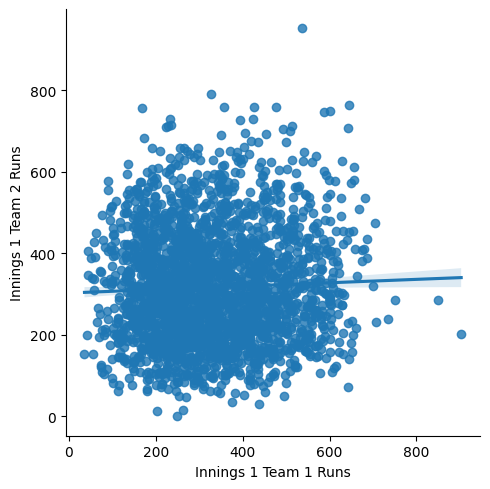

In [34]:
# Creating a scatterplot for the "Innings 1 Team 1 Runs" and "Innings 1 Team 2 Runs" columns in seaborn

scatter2 = sns.lmplot(x = 'Innings 1 Team 1 Runs', y = 'Innings 1 Team 2 Runs', data = df_sub)

In [35]:
#Save as .png

scatter2.savefig("/content/scatter_runs 1st2nd_inns.png")

#8. Discussion of 2nd Scatter Plot

It's clear there is very littel trend here. In the first innigs teams tend to score between 200 and 400 runs.

And so do the team batting second.

Lots of variation and almost no pattern.

Perhaps if worked in units of 25 or 50 a pattern might emerge?

Also be interesting to compare runs in the whole match

# 9. Pair Plot

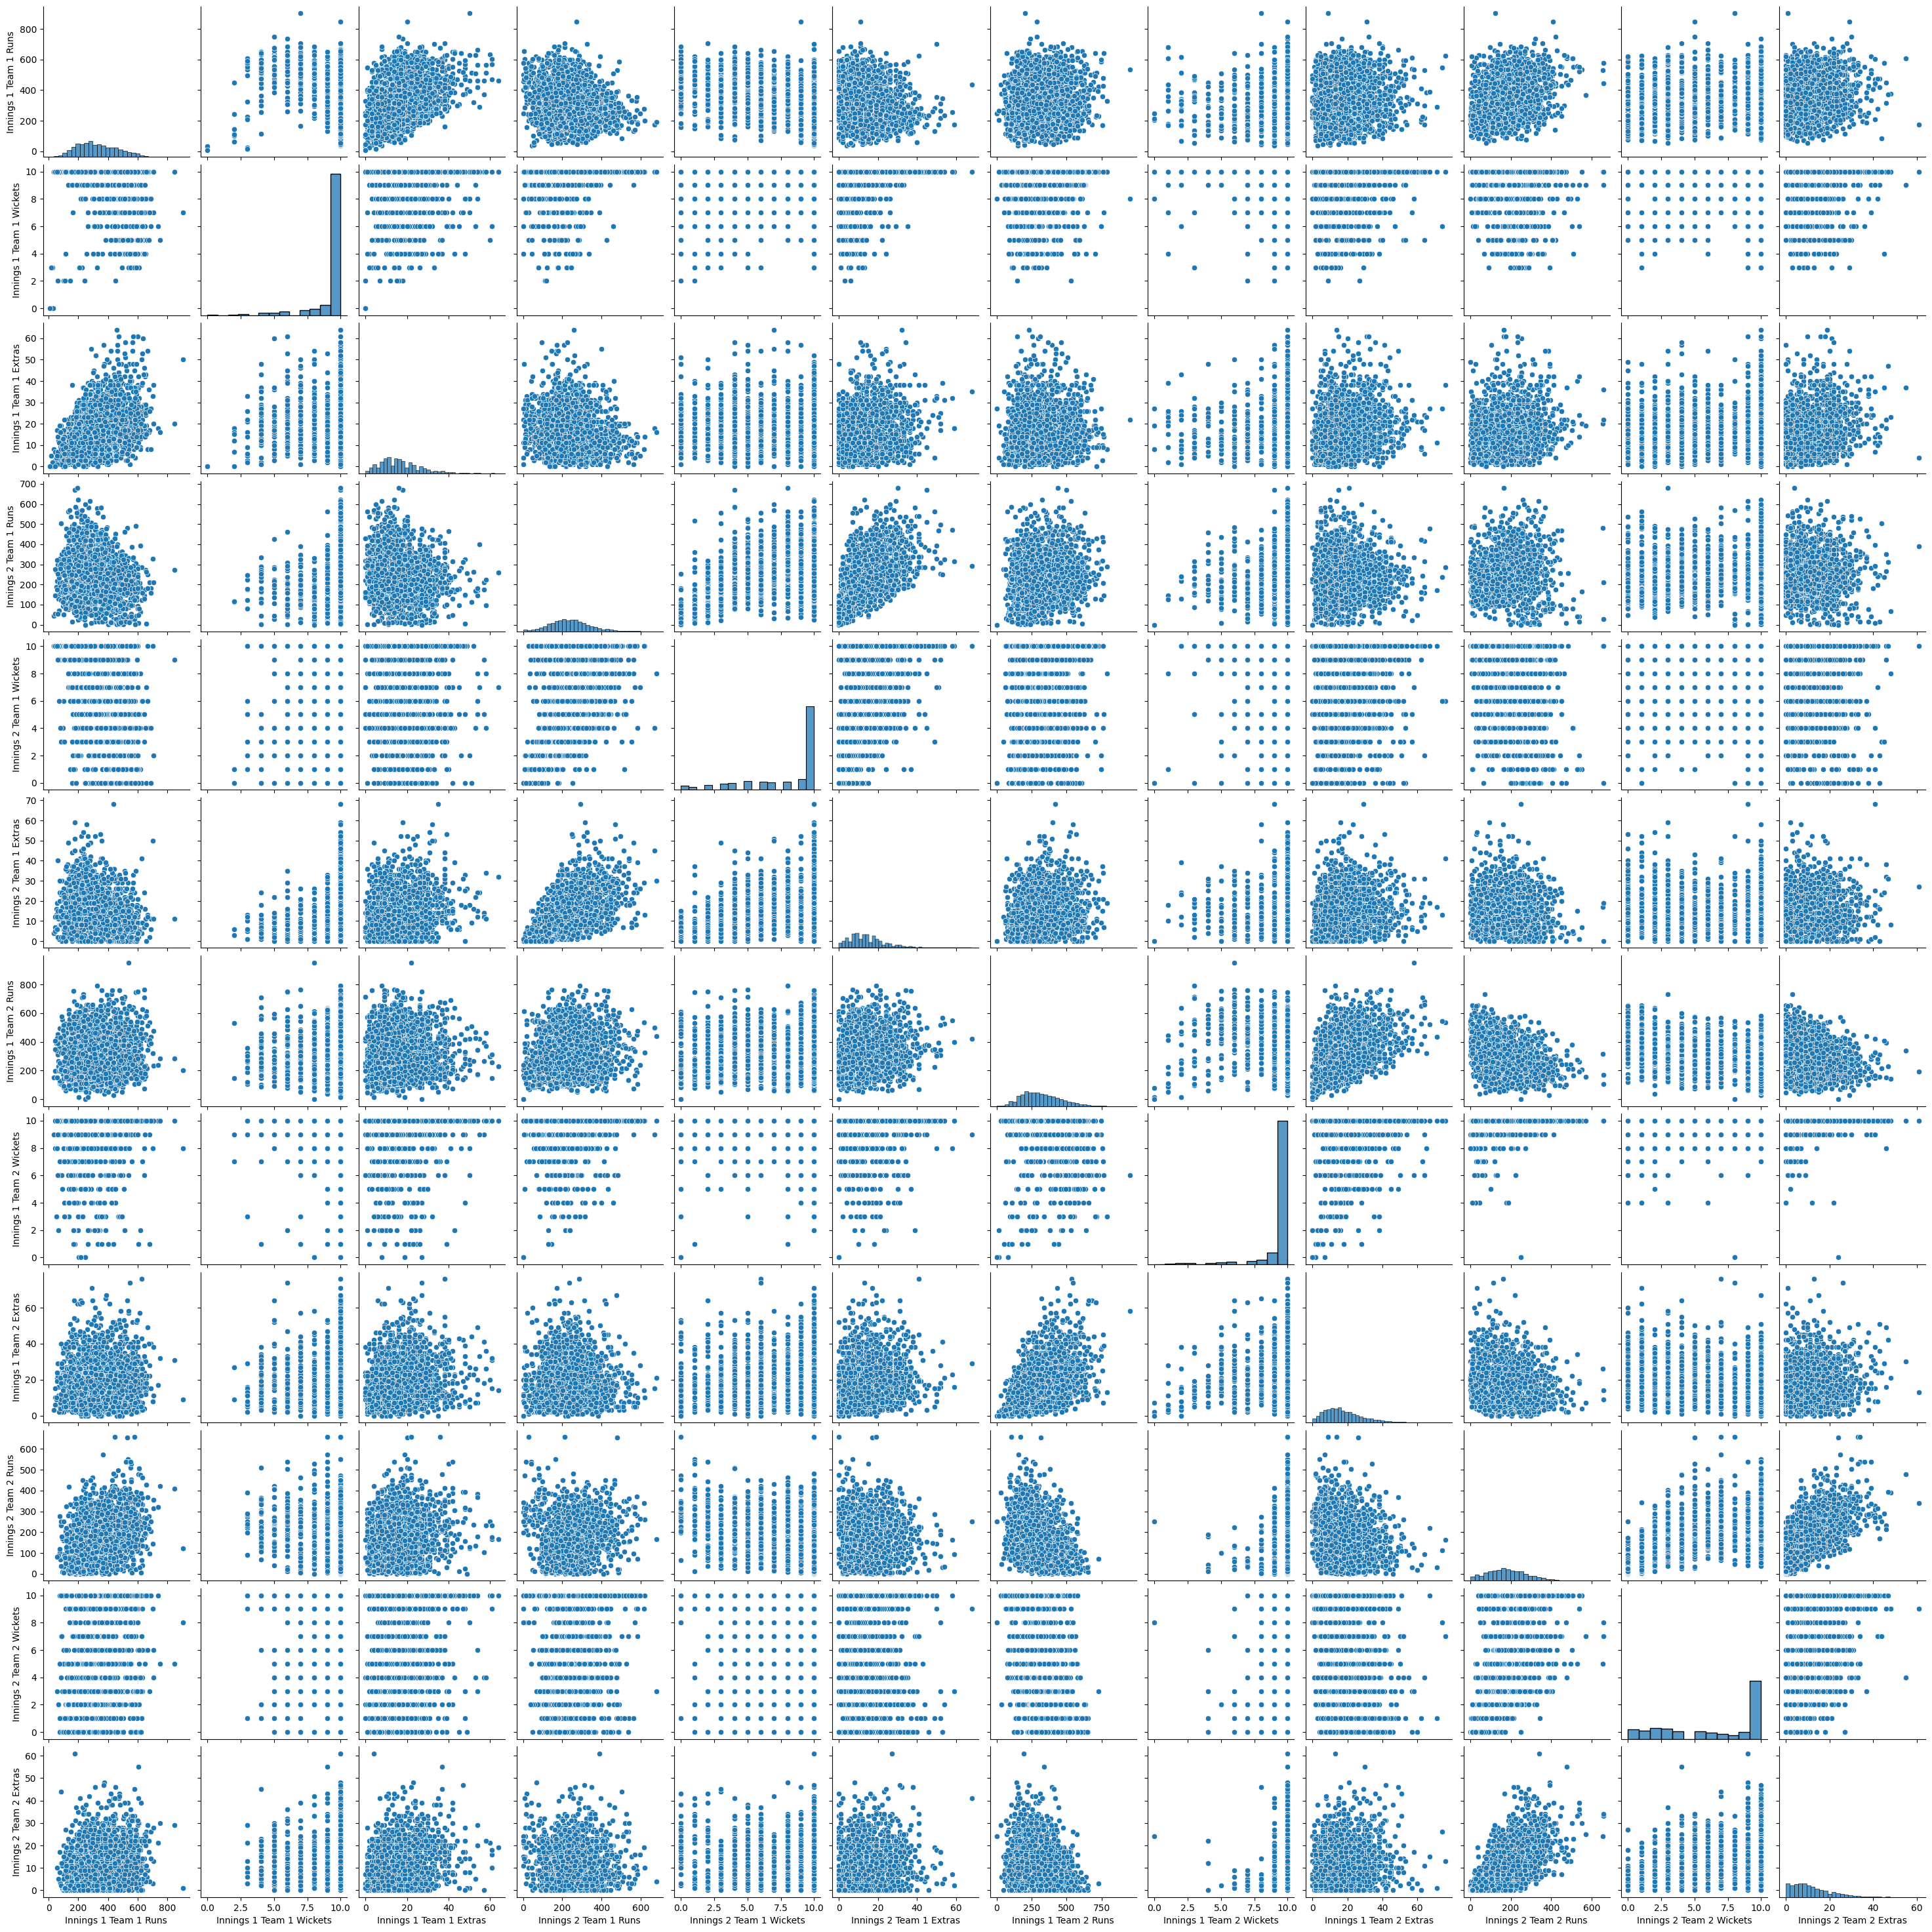

In [36]:
# Create a pair plot

pair = sns.pairplot(df_sub)

That's a bit much! I'm going to tlimit it to first innings to make more sense of it.

In [38]:
df_sub_1st = df_sub.drop(['Innings 2 Team 1 Runs','Innings 2 Team 1 Wickets', 'Innings 2 Team 1 Extras', 'Innings 2 Team 2 Runs', 'Innings 2 Team 2 Wickets', 'Innings 2 Team 2 Extras',
], axis=1)

In [39]:
df_sub_1st.head()

Innings 1 Team 1 Runs  Innings 1 Team 1 Wickets  Innings 1 Team 1 Extras  \
0                    448                        10                       24   
1                     58                        10                       17   
2                    310                         7                       22   
3                    242                        10                       14   
4                    263                        10                       29   

   Innings 1 Team 2 Runs  Innings 1 Team 2 Wickets  Innings 1 Team 2 Extras  
0                  265.0                      10.0                     11.0  
1                  337.0                      10.0                     21.0  
2                  282.0                       7.0                     27.0  
3                  147.0                      10.0                     12.0  
4                  390.0                      10.0                     30.0

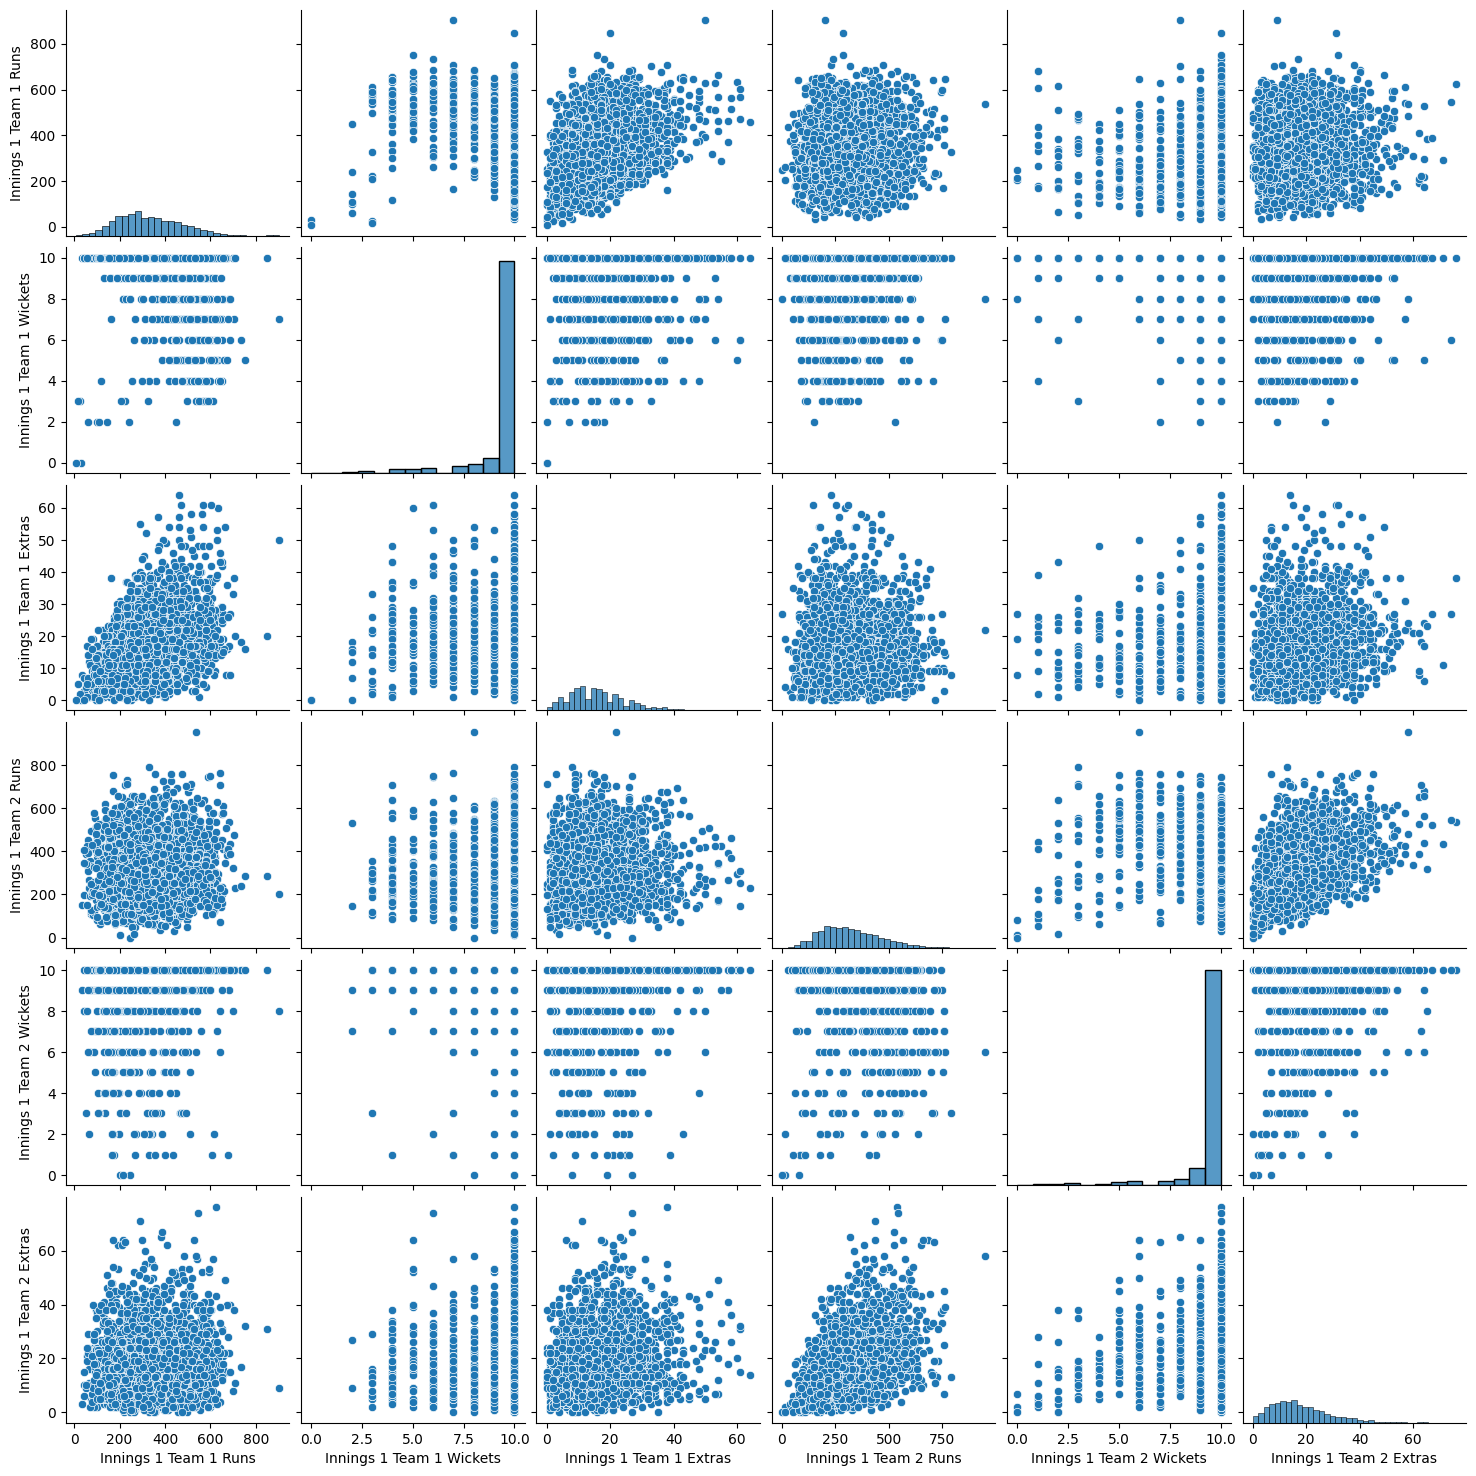

In [40]:
pair_1st = sns.pairplot(df_sub_1st)

#10. Pair Plot Discussion

Just focussing on 1st innings makes it  much clearer picture.

In the scatter plots, we see what we have before. Extras appear tp correlate to runs scored. But one teams score doesn#t seem to correlate to the others'.

Looking at the histtograms, we see a heavy skew to all 10 wickets being lost in the 1st innings as we would expect. The distributions of runs and extras are of a similar shape too.

Looking at runs per wicket in 1st team 1st innings - it appears there is sometign of a sweet spot - it appears a high score of 400 is often acheived for the loff of only around about 5 wickets. And that doesn't appear to be the case in the 2nd innings.


I would like to investigate this further, as well as what subsequently happens in those matches where the team batting first make a large score for few wickets. Do they capitalise on this position?

#11. Categorical Plot

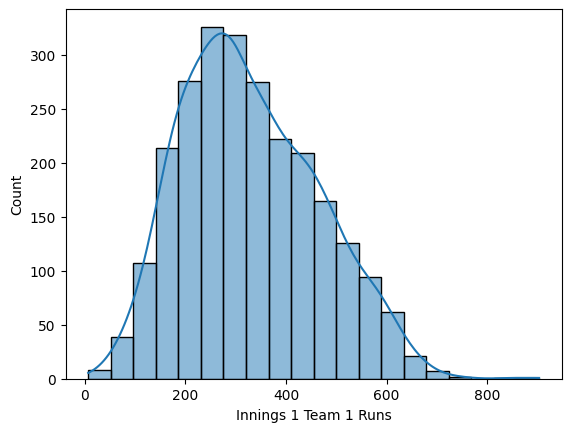

In [46]:
# Want to look at Team 1 Innings 1 Runs per Wicket

#First get a better picture of distributuon of runs

runs  = sns.histplot(df_sub['Innings 1 Team 1 Runs'], bins = 20, kde = True)



In [51]:
# So, I'm calling anythign over 400 a "Big Score"

fig = runs.figure
fig.savefig("/content/hist_runs.png")

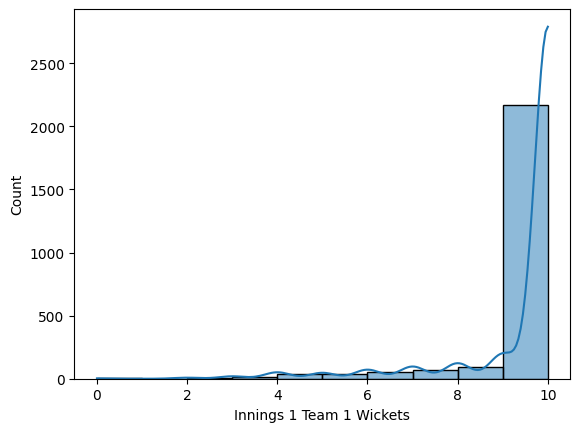

In [48]:
#Now get a better picture of distributuon of wickets

wickets  = sns.histplot(df_sub['Innings 1 Team 1 Wickets'], bins = 10, kde = True)

In [52]:
#So, actually we can count anyhing 8 or below as a "Low Wickets" - it's almost always 9 or 10

fig2 = wickets.figure
fig2.savefig("/content/hist_wickets.png")

In [53]:
#Setting a high score flag for Innings 1 Team 1

df.loc[df['Innings 1 Team 1 Runs'] > 400, 'Score category'] = 'High Score'
df.loc[df['Innings 1 Team 1 Runs'] <= 400, 'Score category'] = 'Normal Score'

In [54]:
df['Score category'].value_counts(dropna = False)

Score category
Normal Score    1740
High Score       733
Name: count, dtype: int64

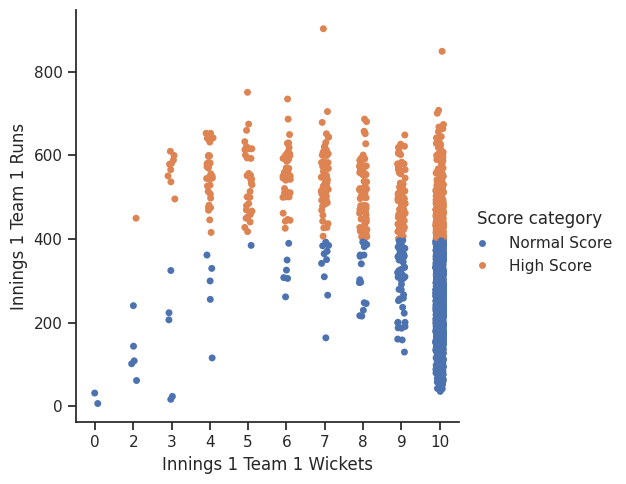

In [56]:
# Categorical plot in seaborn

sns.set(style="ticks")
Catplot = sns.catplot(x="Innings 1 Team 1 Wickets", y="Innings 1 Team 1 Runs", hue="Score category", data=df)

# 12. Categorical Plot Discussion

This more clearly visualises what the chart in the pair plot showed

Teams are most likley to complete their innings. If they don't, it appears they are more likley to get a high score (> 400) than not.

To have a better look at this, I will also create an "Innings complete' category

In [62]:
#Innings complete category

df.loc[df['Innings 1 Team 1 Wickets'] == 10, '10 wickets'] = 'Yes'
df.loc[df['Innings 1 Team 1 Wickets'] < 10, '10 wickets'] = 'No'

In [63]:
df['10 wickets'].value_counts(dropna = False)

10 wickets
Yes    2027
No      446
Name: count, dtype: int64

In [64]:
#subset where all 10 wickets have fallen

df_all_10 = df[df['10 wickets'] == 'Yes']

In [66]:
#subset where all 10 hwickets haven#t fallen

df_not_10 = df[df['10 wickets'] == 'No']

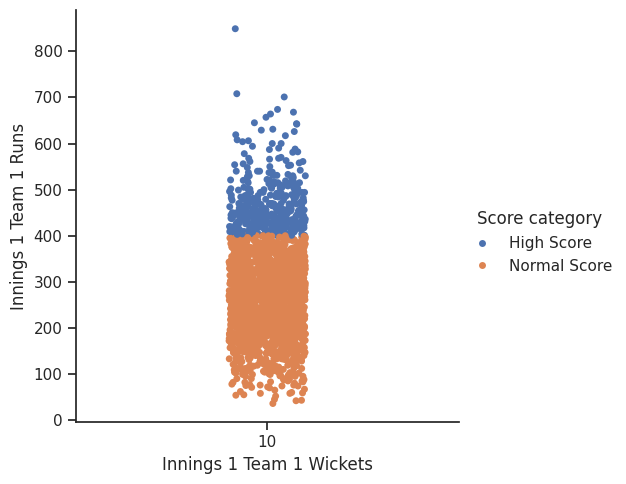

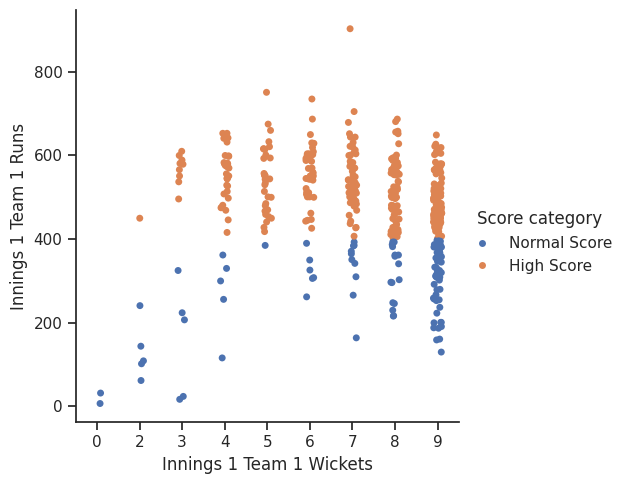

In [69]:
#visualising both instances

#all 10 wickets

sns.set(style="ticks")
Catplot2 = sns.catplot(x="Innings 1 Team 1 Wickets", y="Innings 1 Team 1 Runs", hue="Score category", data=df_all_10)

#not 10 wickets
sns.set(style="ticks")
Catplot3 = sns.catplot(x="Innings 1 Team 1 Wickets", y="Innings 1 Team 1 Runs", hue="Score category", data=df_not_10)

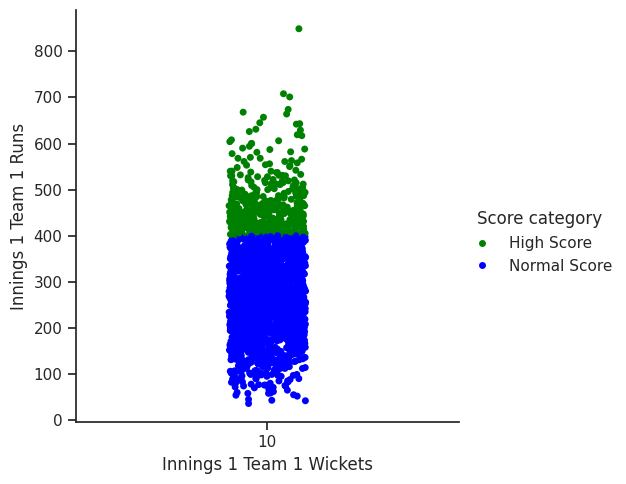

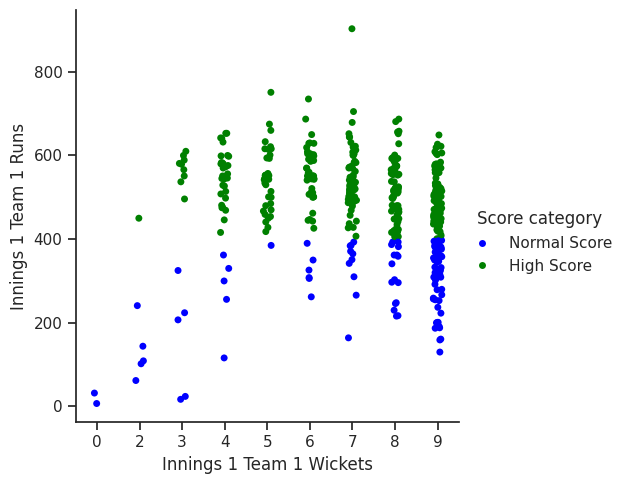

In [73]:
#Frustratingly it's reversed the cloilur scheme for the two charts. I think the larger category gets the "orange" colour
#Got Co-pilot to help me set the palette

sns.set(style="ticks")
Catplot2 = sns.catplot(x="Innings 1 Team 1 Wickets", y="Innings 1 Team 1 Runs", hue="Score category", data=df_all_10, palette={"Normal Score": "blue", "High Score": "green"})

#not 10 wickets
sns.set(style="ticks")
Catplot3 = sns.catplot(x="Innings 1 Team 1 Wickets", y="Innings 1 Team 1 Runs", hue="Score category", data=df_not_10, palette={"Normal Score": "blue", "High Score": "green"})

In [74]:
fig3 = Catplot2.figure
fig3.savefig("/content/CatPlot_all_10.png")

In [75]:
fig4 = Catplot3.figure
fig4.savefig("/content/CatPlot_not_10.png")

This now shows you are for more likely to get a high score if you don't lose all your wickets than if you do.

I'll make this a core part of my ongopng analysis - does this determine how many games you win, and does that trend change over time?